In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import matplotlib
import seaborn as sns
import scipy


from IPython.display import HTML

# Assessing the relative impacts of constraints and calibrations on dating accuracy

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

## Analysis of 800 MCMC runs on simulated data. 
The simulation was performed on 10 different trees, used to generate alignments. For each tree, we gathered up to 5 calibration points (0, 1, 3, 5), and up to 5 constraints (0, 1, 3, 5). We ran the MCMC in each combination of conditions (=16 combinations), in 5 replicates, changing the nature of the calibrations and constraints. So in total we have $10~trees*16~conditions*5~replicates=800~points$.

## Reading the data

In [3]:

colNames = ["treeId","numCalib","numCons","numReplicate","correlation","numNodes","numInHPD","fracInHPD","percent0","percent25","percent50","percent75","percent100"]
d = pd.read_csv ("resultAllTrees.txt", sep="\t", header=None, names=colNames)


In [4]:
d.describe()


,treeId,numCalib,numCons,numReplicate,correlation,numNodes,numInHPD,fracInHPD,percent0,percent25,percent50,percent75,percent100
count,797.000000,797.000000,797.000000,797.000000,797.000000,797.0,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000,797.000000
mean,5.493099,2.249686,2.242158,3.001255,0.878433,29.0,21.987453,75.818803,0.685788,2.933684,4.683686,6.374275,8.743627
std,2.873640,1.924228,1.919964,1.416432,0.074803,0.0,4.121563,14.212285,0.222800,0.996447,1.494798,2.066152,3.397510
min,1.000000,0.000000,0.000000,1.000000,0.606824,29.0,5.000000,17.241379,0.008700,0.263751,0.403635,0.514055,0.664912
25%,3.000000,0.000000,0.000000,2.000000,0.843759,29.0,19.000000,65.517241,0.559900,2.247074,3.592815,5.028440,6.531134
50%,5.000000,1.000000,1.000000,3.000000,0.889605,29.0,21.000000,72.413793,0.669100,2.780452,4.268736,5.798990,7.743920
75%,8.000000,5.000000,3.000000,4.000000,0.939466,29.0,26.000000,89.655172,0.765700,3.523998,5.620091,7.240298,9.550808
max,10.000000,5.000000,5.000000,5.000000,0.979193,29.0,29.000000,100.000000,1.245100,6.773768,11.375833,14.228750,20.732230


## Analysis of the impact of constraints
In the following 3 plots, we investigate the impact of constraints, not controlling for the number of calibrations.

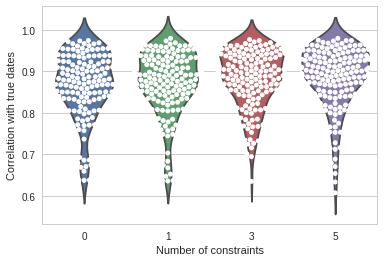

In [5]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.violinplot(d["numCons"], y=d["correlation"], inner=None)
ax = sns.swarmplot(d["numCons"], y=d["correlation"], color="white", edgecolor="gray")
ax.set(xlabel='Number of constraints', ylabel='Correlation with true dates')

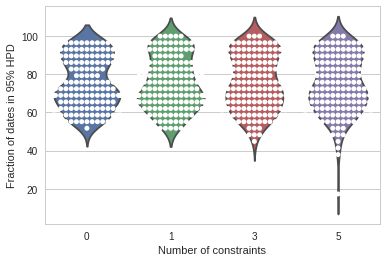

In [6]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.violinplot(d["numCons"], y=d["fracInHPD"], inner=None)
ax = sns.swarmplot(d["numCons"], y=d["fracInHPD"], color="white", edgecolor="gray")
ax.set(xlabel='Number of constraints', ylabel='Fraction of dates in 95% HPD')

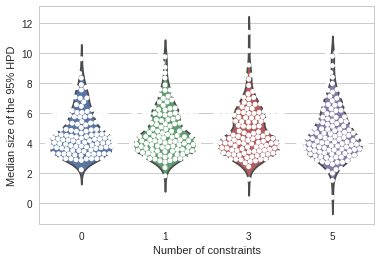

In [7]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.violinplot(d["numCons"], y=d["percent50"], inner=None)
ax = sns.swarmplot(d["numCons"], y=d["percent50"], color="white", edgecolor="gray")
ax.set(xlabel='Number of constraints', ylabel='Median size of the 95% HPD')

### Partial conclusion on the above
As the number of constraints increases from 0 to 5, the accuracy of the reconstruction improves a little bit, despite smaller 95%HPD. 

## Analysis of the impact of calibrations
In the following 3 plots, we investigate the impact of calibrations, not controlling for the number of constraints.

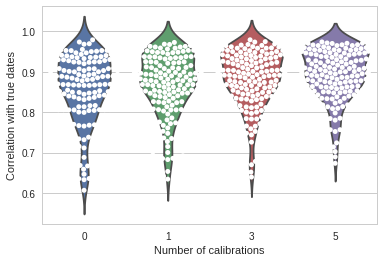

In [8]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.violinplot(d["numCalib"], y=d["correlation"], inner=None)
ax = sns.swarmplot(d["numCalib"], y=d["correlation"], color="white", edgecolor="gray")
ax.set(xlabel='Number of calibrations', ylabel='Correlation with true dates')

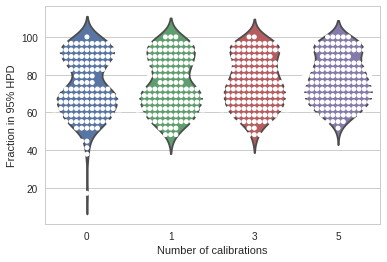

In [9]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.violinplot(d["numCalib"], y=d["fracInHPD"], inner=None)
ax = sns.swarmplot(d["numCalib"], y=d["fracInHPD"], color="white", edgecolor="gray")
ax.set(xlabel='Number of calibrations', ylabel='Fraction in 95% HPD')

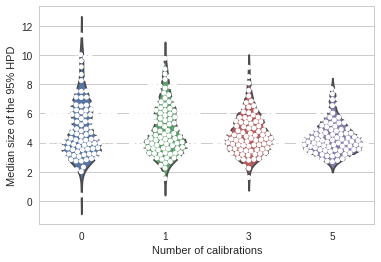

In [10]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.violinplot(d["numCalib"], y=d["percent50"], inner=None)
ax = sns.swarmplot(d["numCalib"], y=d["percent50"], color="white", edgecolor="gray")
ax.set(xlabel='Number of calibrations', ylabel='Median size of the 95% HPD')

### Partial conclusion on the above
As the number of calibrations increases from 0 to 5, the accuracy of the reconstruction improves, despite smaller 95%HPD. The effect of calibrations seems stronger than that of constraints.

## Let's look at constraints, controlling for calibrations
In the following 7 plots, we separate the impacts of constraints and calibrations.

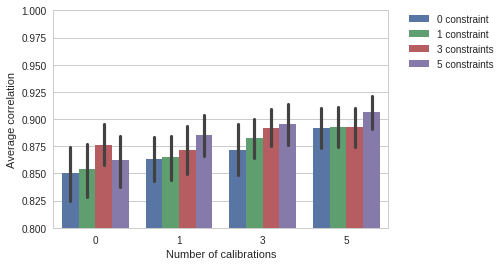

In [11]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="correlation", x="numCalib", data=d)
ax.set_ylim(0.8, 1.0)
ax.set(xlabel='Number of calibrations', ylabel='Average correlation')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints", ])

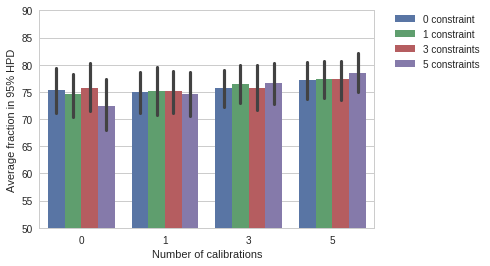

In [12]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="fracInHPD", x="numCalib", data=d)
ax.set_ylim(50, 90)
ax.set(xlabel='Number of calibrations', ylabel='Average fraction in 95% HPD')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints", ])

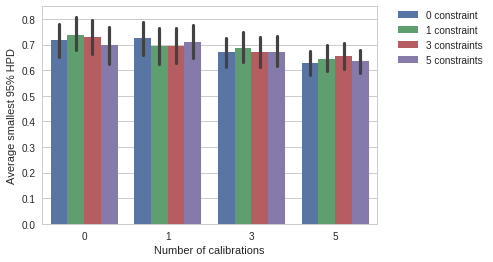

In [13]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="percent0", x="numCalib", data=d)
ax.set(xlabel='Number of calibrations', ylabel='Average smallest 95% HPD')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints", ])

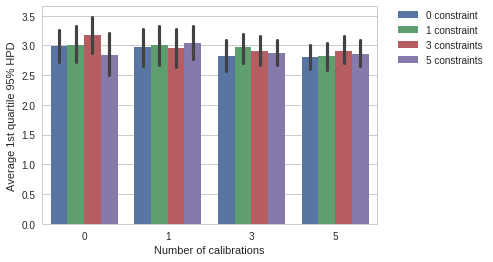

In [14]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="percent25", x="numCalib", data=d)
ax.set(xlabel='Number of calibrations', ylabel='Average 1st quartile 95% HPD')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints", ])

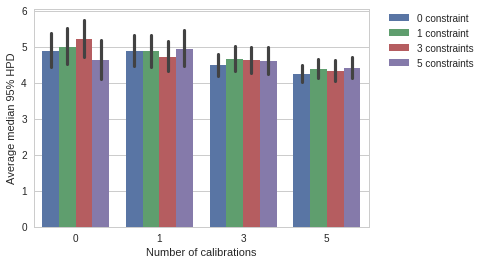

In [15]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="percent50", x="numCalib", data=d)
ax.set(xlabel='Number of calibrations', ylabel='Average median 95% HPD')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints", ])

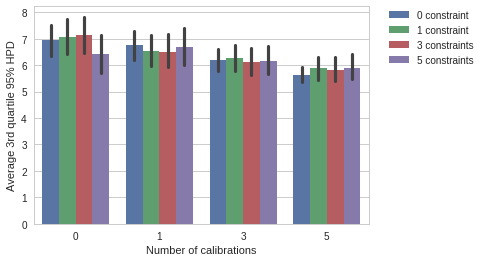

In [16]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="percent75", x="numCalib", data=d)
ax.set(xlabel='Number of calibrations', ylabel='Average 3rd quartile 95% HPD')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints", ])

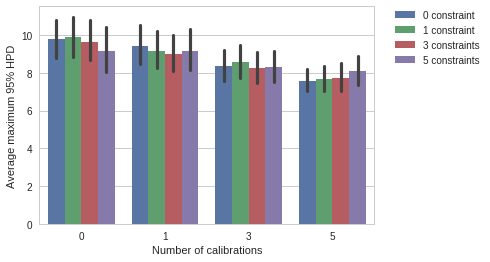

In [17]:
%matplotlib inline
ax = sns.barplot(hue="numCons", y="percent100", x="numCalib", data=d)
ax.set(xlabel='Number of calibrations', ylabel='Average maximum 95% HPD')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["0 constraint", "1 constraint", "3 constraints", "5 constraints", ])

### Partial conclusion on the above
Constraints and calibrations both improve accuracy. The number of constraints does not seem to have much of an effect on the size of the 95% HPD, contrary to calibrations.

## Comparison between trees
In the following 2 plots, we look at the impact of the 10 different trees.

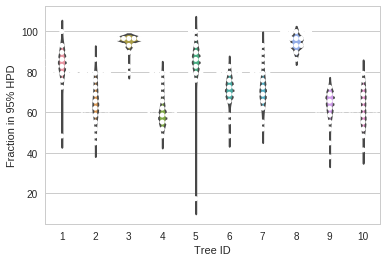

In [18]:
%matplotlib inline
sns.set_style("whitegrid")
ax = sns.violinplot(d["treeId"], y=d["fracInHPD"], inner=None)
ax = sns.swarmplot(d["treeId"], y=d["fracInHPD"], color="white", edgecolor="gray")
ax.set(xlabel='Tree ID', ylabel='Fraction in 95% HPD')


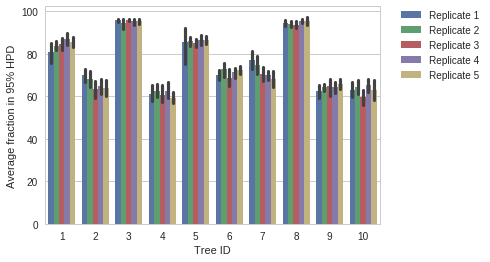

In [19]:
%matplotlib inline
ax = sns.barplot(hue="numReplicate", y="fracInHPD", x="treeId", data=d)
ax.set(xlabel='Tree ID', ylabel='Average fraction in 95% HPD')
# Put the legend out of the figure
handles, labels = ax.get_legend_handles_labels()
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., handles=handles, labels=["Replicate 1", "Replicate 2", "Replicate 3", "Replicate 4", "Replicate 5"])

### Partial conclusion on the above
Some trees are consistently easy, some consistently hard.

## Variation among replicates, controlling for a given set of conditions, focusing on constraints
For a given number of constraints, calibrations, and a given tree, we want to assess how variable the results are, focusing on the impact of calibrations (whose number has been color-coded).

In [20]:

#groupedByReplicates = d.groupby(["treeId","numCalib","numCons"], group_keys=True)
#groupedByReplicates.describe()

#groupedByReplicates.columns = ["_".join(x) for x in groupedByReplicates.columns.ravel()]
#groupedByReplicates.describe()

#groupedByReplicates["correlation"]

cors=pd.DataFrame({'var' : d.groupby( ["treeId","numCalib","numCons"] )["correlation"].std()}).reset_index()
#cors.head(32)

    #pd.boxplot_frame_groupby(groupedByReplicates)
#groupedByReplicates["correlation"].boxplot()
#print(d.groupby(["treeId","numCalib","numCons"])["correlation"].var().unstack())
#d.groupby(["treeId","numCalib","numCons"])["correlation"].var().unstack().boxplot()

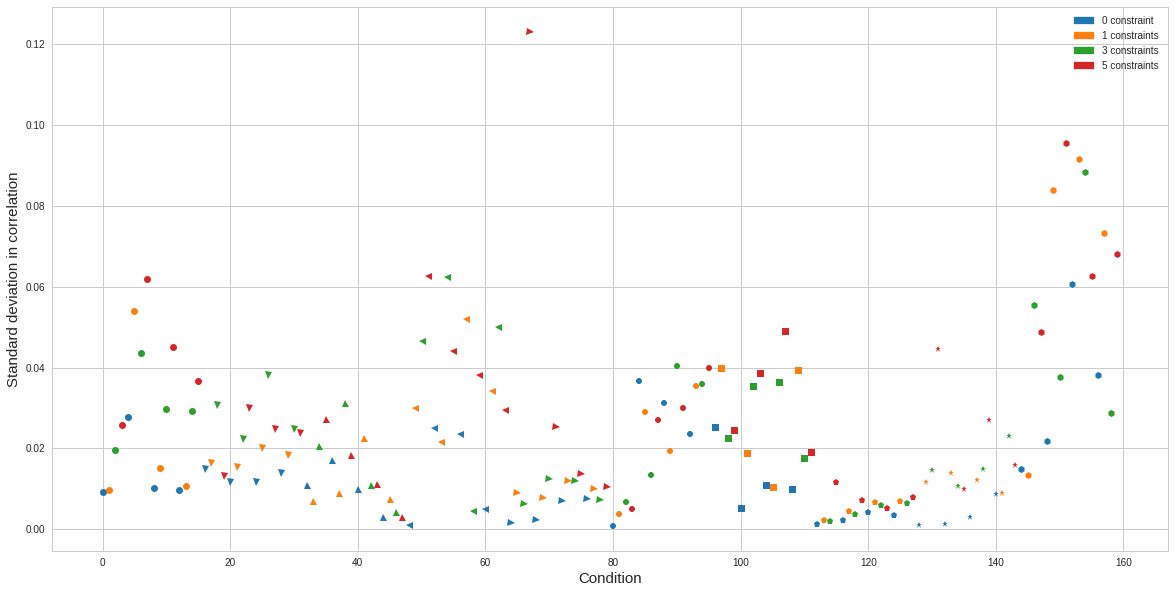

In [21]:
%matplotlib inline

# Select the color map named rainbow
cmap = plt.cm.get_cmap(name='tab10')


fig, ax = plt.subplots(figsize=(20, 10))
for i in range(160):
    mark = ""
    if i < 16:
        mark="o"
    elif i < 32:
        mark="v"
    elif i < 48:
        mark="^"
    elif i < 64:
        mark="<"
    elif i < 80:
        mark=">"
    elif i < 96:
        mark="8"
    elif i < 112:
        mark="s"
    elif i < 128:
        mark="p"
    elif i < 144:
        mark="*"
    else:
        mark="h"
    ax.plot(i, cors["var"][i], mark, color = cmap(i % 4))

patches=list()
patches.append(matplotlib.patches.Patch(color=cmap(0), label='0 constraint'))
patches.append(matplotlib.patches.Patch(color=cmap(1), label='1 constraints'))
patches.append(matplotlib.patches.Patch(color=cmap(2), label='3 constraints'))
patches.append(matplotlib.patches.Patch(color=cmap(3), label='5 constraints'))


ax.legend(handles=patches)

plt.xlabel("Condition", fontsize=15)
plt.ylabel("Standard deviation in correlation", fontsize=15)


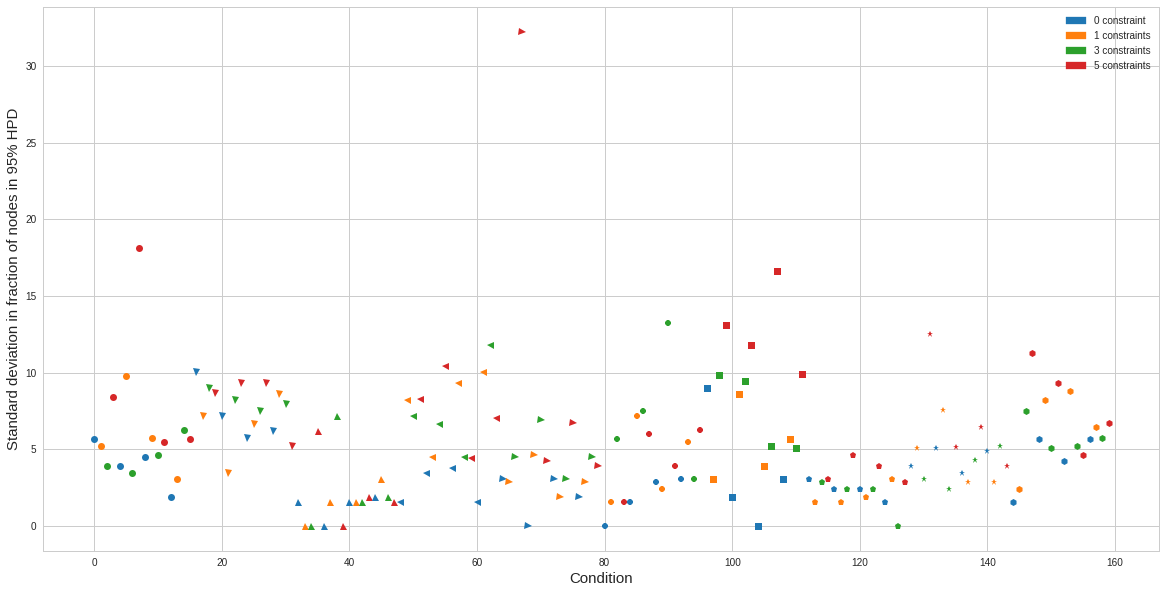

In [22]:
%matplotlib inline

fracInHPD=pd.DataFrame({'var' : d.groupby( ["treeId","numCalib","numCons"] )["fracInHPD"].std()}).reset_index()


# Select the color map
cmap = plt.cm.get_cmap(name='tab10')

fig, ax = plt.subplots(figsize=(20, 10))
for i in range(160):
    mark = ""
    if i < 16:
        mark="o"
    elif i < 32:
        mark="v"
    elif i < 48:
        mark="^"
    elif i < 64:
        mark="<"
    elif i < 80:
        mark=">"
    elif i < 96:
        mark="8"
    elif i < 112:
        mark="s"
    elif i < 128:
        mark="p"
    elif i < 144:
        mark="*"
    else:
        mark="h"
    ax.plot(i, fracInHPD["var"][i], mark, color = cmap(i % 4))

patches=list()
patches.append(matplotlib.patches.Patch(color=cmap(0), label='0 constraint'))
patches.append(matplotlib.patches.Patch(color=cmap(1), label='1 constraints'))
patches.append(matplotlib.patches.Patch(color=cmap(2), label='3 constraints'))
patches.append(matplotlib.patches.Patch(color=cmap(3), label='5 constraints'))


ax.legend(handles=patches)

plt.xlabel("Condition", fontsize=15)
plt.ylabel("Standard deviation in fraction of nodes in 95% HPD", fontsize=15)


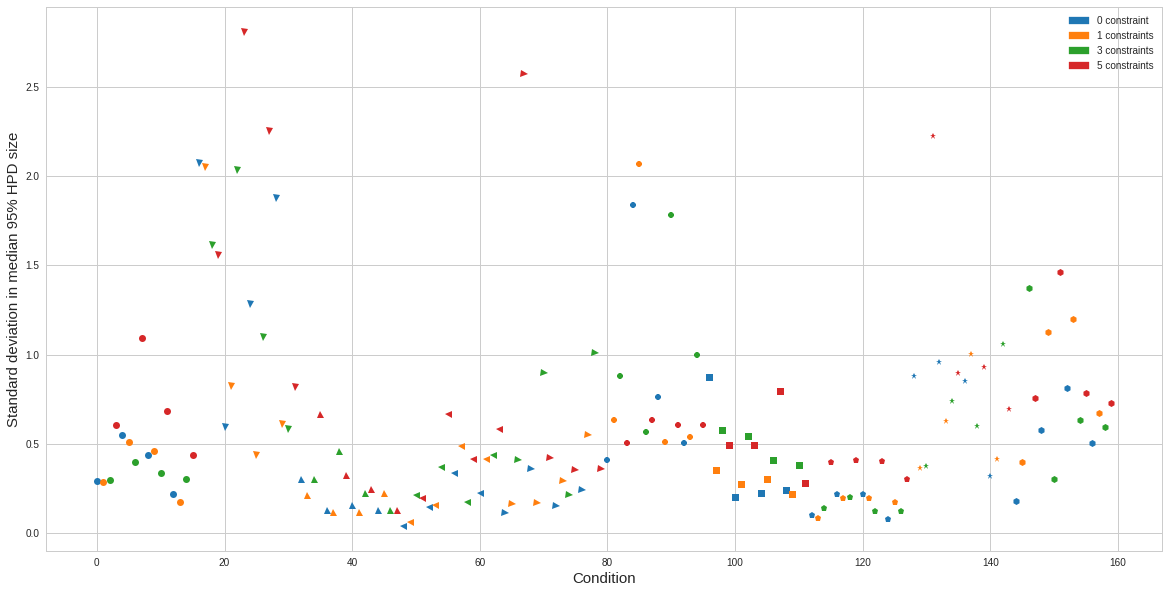

In [23]:
%matplotlib inline

percent50=pd.DataFrame({'var' : d.groupby( ["treeId","numCalib","numCons"] )["percent50"].std()}).reset_index()


# Select the color map
cmap = plt.cm.get_cmap(name='tab10')

fig, ax = plt.subplots(figsize=(20, 10))
for i in range(160):
    mark = ""
    if i < 16:
        mark="o"
    elif i < 32:
        mark="v"
    elif i < 48:
        mark="^"
    elif i < 64:
        mark="<"
    elif i < 80:
        mark=">"
    elif i < 96:
        mark="8"
    elif i < 112:
        mark="s"
    elif i < 128:
        mark="p"
    elif i < 144:
        mark="*"
    else:
        mark="h"
    ax.plot(i, percent50["var"][i], mark, color = cmap(i % 4))

patches=list()
patches.append(matplotlib.patches.Patch(color=cmap(0), label='0 constraint'))
patches.append(matplotlib.patches.Patch(color=cmap(1), label='1 constraints'))
patches.append(matplotlib.patches.Patch(color=cmap(2), label='3 constraints'))
patches.append(matplotlib.patches.Patch(color=cmap(3), label='5 constraints'))


ax.legend(handles=patches)

plt.xlabel("Condition", fontsize=15)
plt.ylabel("Standard deviation in median 95% HPD size", fontsize=15)


### Partial conclusion on the above
It's hard to come up with much to say about the above graphs, except that even controlling for a given number of constraints on a given tree, there can be variation in the accuracy or the 95% HPD. This is expected given that constraints could be positioned on different nodes of the tree.

## Variation among replicates, controlling for a given set of conditions, focusing on calibrations
For a given number of constraints, calibrations, and a given tree, we want to assess how variable the results are, focusing on the impact of calibrations (whose number has been color-coded).

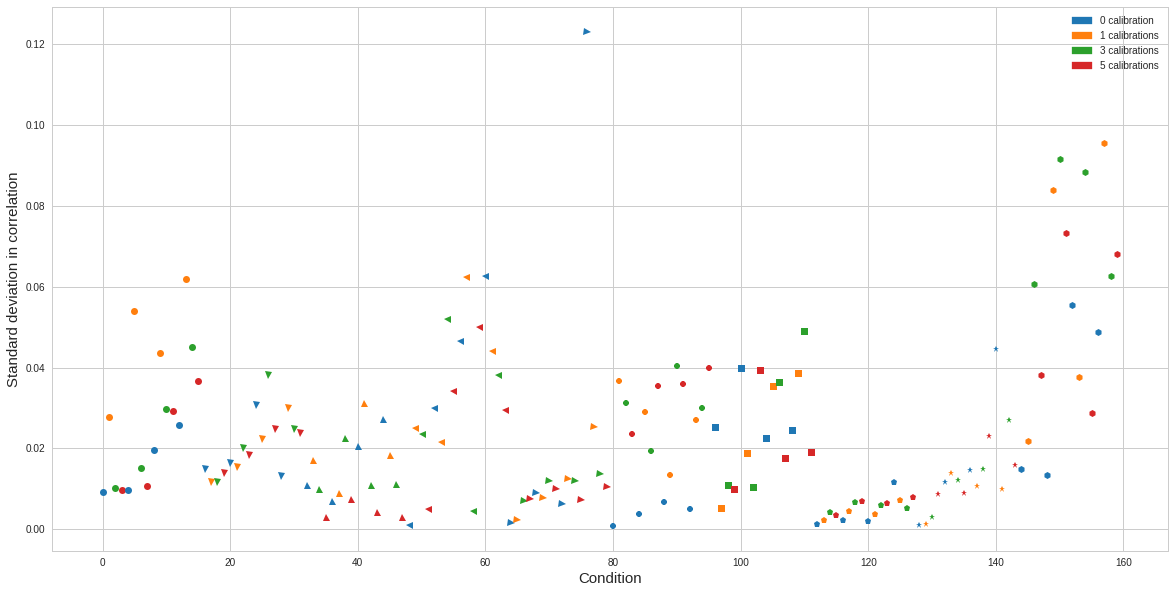

In [24]:
%matplotlib inline


cors=pd.DataFrame({'var' : d.groupby( ["treeId","numCons", "numCalib"] )["correlation"].std()}).reset_index()

cors.head(32)

# Select the color map named rainbow
cmap = plt.cm.get_cmap(name='tab10')


fig, ax = plt.subplots(figsize=(20, 10))
for i in range(160):
    mark = ""
    if i < 16:
        mark="o"
    elif i < 32:
        mark="v"
    elif i < 48:
        mark="^"
    elif i < 64:
        mark="<"
    elif i < 80:
        mark=">"
    elif i < 96:
        mark="8"
    elif i < 112:
        mark="s"
    elif i < 128:
        mark="p"
    elif i < 144:
        mark="*"
    else:
        mark="h"
    ax.plot(i, cors["var"][i], mark, color = cmap(i % 4))

patches=list()
patches.append(matplotlib.patches.Patch(color=cmap(0), label='0 calibration'))
patches.append(matplotlib.patches.Patch(color=cmap(1), label='1 calibrations'))
patches.append(matplotlib.patches.Patch(color=cmap(2), label='3 calibrations'))
patches.append(matplotlib.patches.Patch(color=cmap(3), label='5 calibrations'))


ax.legend(handles=patches)

plt.xlabel("Condition", fontsize=15)
plt.ylabel("Standard deviation in correlation", fontsize=15)


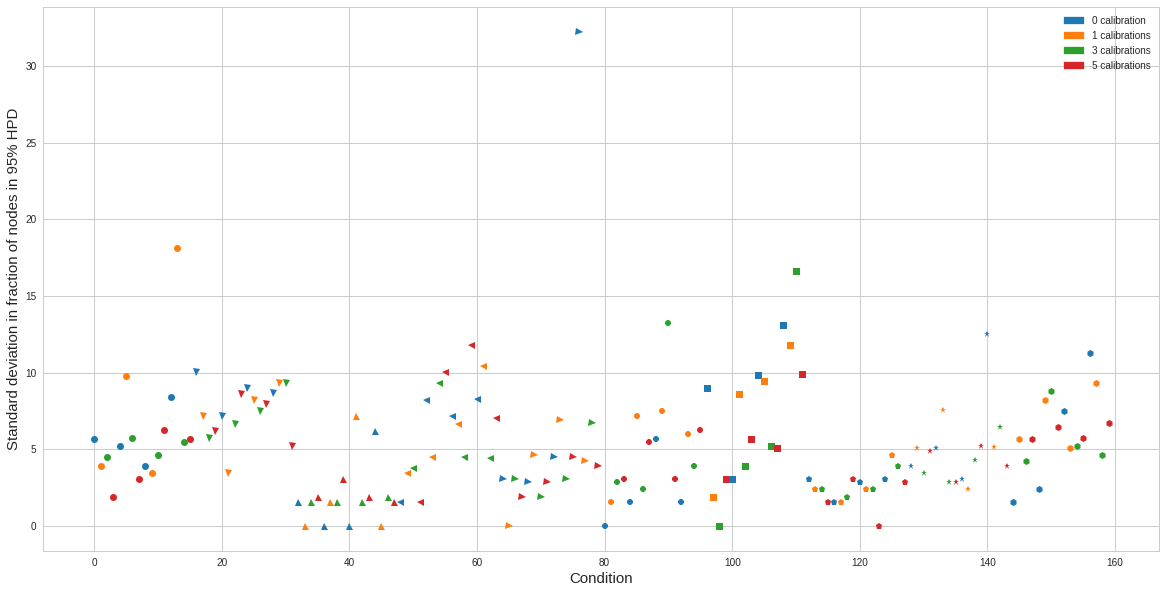

In [25]:
%matplotlib inline

fracInHPD=pd.DataFrame({'var' : d.groupby( ["treeId","numCons", "numCalib"] )["fracInHPD"].std()}).reset_index()


# Select the color map
cmap = plt.cm.get_cmap(name='tab10')

fig, ax = plt.subplots(figsize=(20, 10))
for i in range(160):
    mark = ""
    if i < 16:
        mark="o"
    elif i < 32:
        mark="v"
    elif i < 48:
        mark="^"
    elif i < 64:
        mark="<"
    elif i < 80:
        mark=">"
    elif i < 96:
        mark="8"
    elif i < 112:
        mark="s"
    elif i < 128:
        mark="p"
    elif i < 144:
        mark="*"
    else:
        mark="h"
    ax.plot(i, fracInHPD["var"][i], mark, color = cmap(i % 4))

patches=list()
patches.append(matplotlib.patches.Patch(color=cmap(0), label='0 calibration'))
patches.append(matplotlib.patches.Patch(color=cmap(1), label='1 calibrations'))
patches.append(matplotlib.patches.Patch(color=cmap(2), label='3 calibrations'))
patches.append(matplotlib.patches.Patch(color=cmap(3), label='5 calibrations'))


ax.legend(handles=patches)

plt.xlabel("Condition", fontsize=15)
plt.ylabel("Standard deviation in fraction of nodes in 95% HPD", fontsize=15)


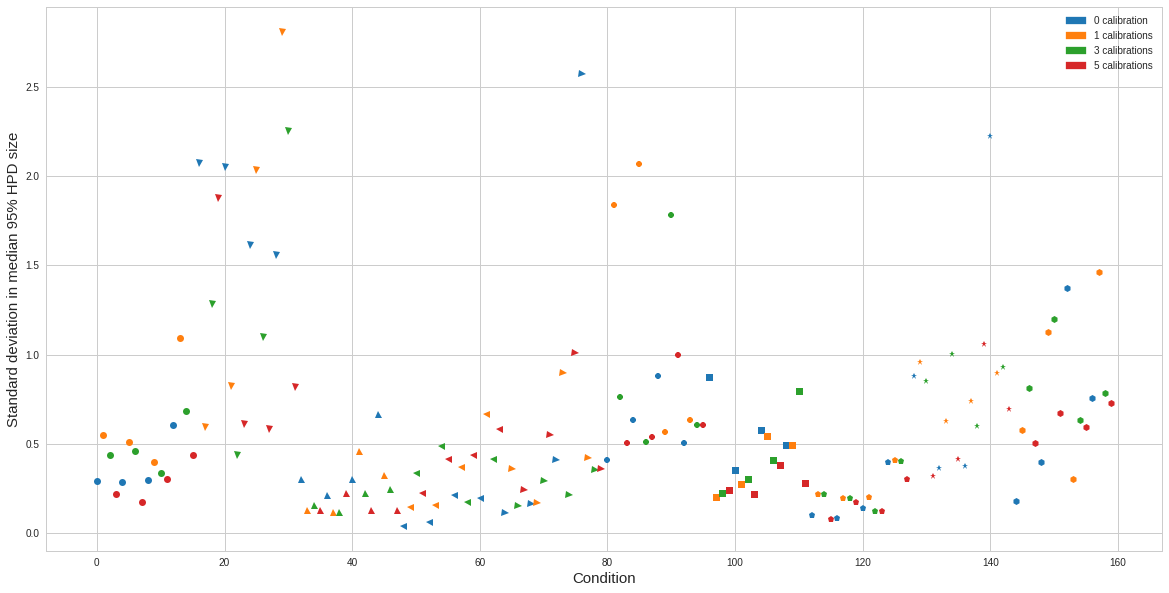

In [26]:
%matplotlib inline

percent50=pd.DataFrame({'var' : d.groupby( ["treeId","numCons", "numCalib"] )["percent50"].std()}).reset_index()


# Select the color map
cmap = plt.cm.get_cmap(name='tab10')

fig, ax = plt.subplots(figsize=(20, 10))
for i in range(160):
    mark = ""
    if i < 16:
        mark="o"
    elif i < 32:
        mark="v"
    elif i < 48:
        mark="^"
    elif i < 64:
        mark="<"
    elif i < 80:
        mark=">"
    elif i < 96:
        mark="8"
    elif i < 112:
        mark="s"
    elif i < 128:
        mark="p"
    elif i < 144:
        mark="*"
    else:
        mark="h"
    ax.plot(i, percent50["var"][i], mark, color = cmap(i % 4))

patches=list()
patches.append(matplotlib.patches.Patch(color=cmap(0), label='0 calibration'))
patches.append(matplotlib.patches.Patch(color=cmap(1), label='1 calibrations'))
patches.append(matplotlib.patches.Patch(color=cmap(2), label='3 calibrations'))
patches.append(matplotlib.patches.Patch(color=cmap(3), label='5 calibrations'))


ax.legend(handles=patches)

plt.xlabel("Condition", fontsize=15)
plt.ylabel("Standard deviation in median 95% HPD size", fontsize=15)


### Partial conclusion on the above
Similarly to the analyses focusing on the number of constraints, there can be some variation in some conditions, even with 5 calibrations.

## Analysis of convergence in a random replicate
Here we just look at how well the MCMC seems to mix in a particular example. I also did another test based on replicate runs, and it seemed OK.

This could be systematized by looking at all runs.

In [27]:
d1=pd.read_csv ("output/10_0_0_1.log", sep="\t")
d1.describe()


,Iteration,Posterior,Likelihood,Prior,birth_rate,branch_rates[1],branch_rates[2],branch_rates[3],branch_rates[4],branch_rates[5],...,tmrca_clade_14,tmrca_clade_2,tmrca_clade_3,tmrca_clade_4,tmrca_clade_5,tmrca_clade_6,tmrca_clade_7,tmrca_clade_8,tmrca_clade_9,turnover
count,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,1.000010e+05,1.000010e+05,1.000010e+05,1.000010e+05,1.000010e+05,...,100001.000000,100001.000000,100001.000000,100001.000000,100001.000000,1.000010e+05,100001.000000,1.000010e+05,100001.000000,100001.000000
mean,500000.000000,-2413.696164,-2543.768917,130.072755,0.302158,2.358784e-03,2.334414e-03,2.808461e-03,2.817774e-03,2.331821e-03,...,7.502459,1.256135,0.759422,0.616249,4.743702,1.752486e+01,15.002612,1.718787e-01,3.427261,0.237722
std,288679.464718,9.822468,5.049627,8.306314,0.110776,3.072272e-03,2.999766e-03,3.343028e-03,3.351758e-03,2.813833e-03,...,2.308692,0.854397,0.536105,0.560840,2.523796,4.771318e-12,2.208422,2.061206e-01,1.630491,0.176052
min,0.000000,-2475.320000,-2571.210000,72.063800,0.212914,2.063440e-08,5.796220e-09,1.508730e-08,5.340640e-08,1.784860e-09,...,0.928274,0.020889,0.010241,0.000583,0.144142,1.752486e+01,3.196219,1.300278e-07,0.240729,0.000002
25%,250000.000000,-2419.870000,-2546.970000,125.074000,0.234666,4.883310e-04,4.843310e-04,6.703580e-04,6.663530e-04,5.546670e-04,...,5.818107,0.636903,0.380713,0.231722,2.817024,1.752486e+01,13.790940,4.135269e-02,2.238159,0.092694
50%,500000.000000,-2413.080000,-2543.430000,130.732000,0.267027,1.305100e-03,1.296730e-03,1.709320e-03,1.706930e-03,1.408350e-03,...,7.291194,1.052559,0.622209,0.450383,4.257708,1.752486e+01,15.625530,1.044460e-01,3.152610,0.202652
75%,750000.000000,-2406.830000,-2540.220000,135.843000,0.327724,3.016230e-03,3.004610e-03,3.693180e-03,3.710950e-03,3.048520e-03,...,8.968104,1.657145,0.987536,0.817519,6.214762,1.752486e+01,16.770650,2.239934e-01,4.316890,0.350325
max,1000000.000000,-2378.090000,-2527.210000,156.920000,2.680619,5.790710e-02,5.068720e-02,6.083550e-02,5.308740e-02,5.013210e-02,...,16.908960,9.999471,5.885934,7.214298,16.037410,1.752486e+01,17.524850,3.520101e+00,14.788880,0.920573


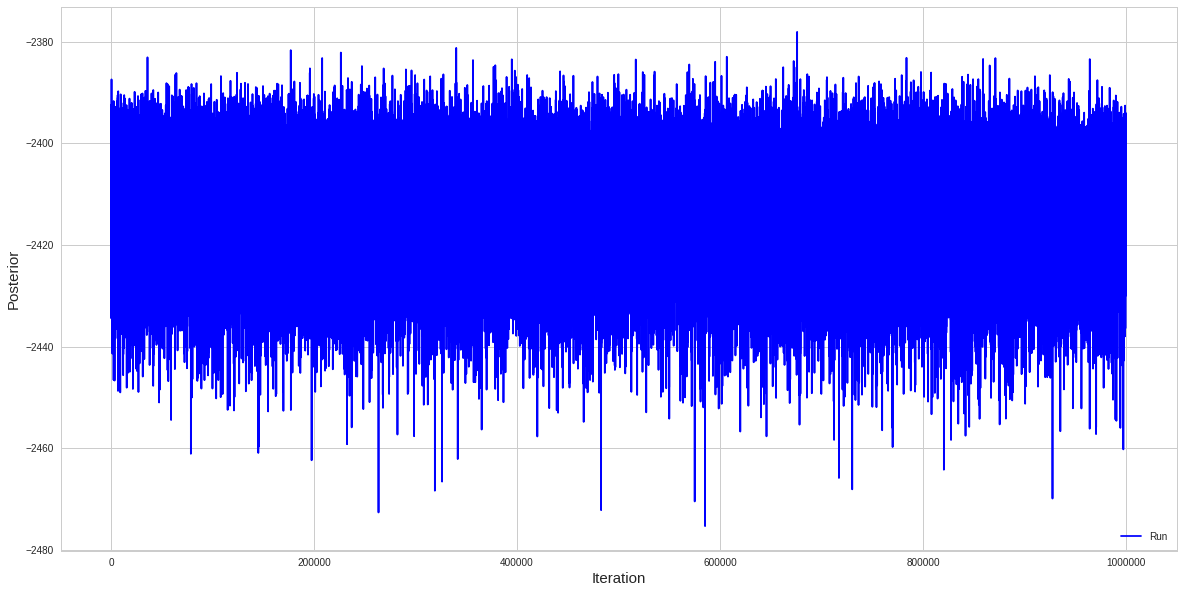

In [28]:
%matplotlib inline

fig, ax = plt.subplots(1, figsize=(20, 10))
cl, = ax.plot(d1['Iteration'], d1['Posterior'], 'b-')
#cal, = ax[1].plot(d2['Iteration'], d2['Posterior'], 'g-')
#con, = ax[2].plot(d3['Iteration'], d3['Posterior'], 'r-')

ax.legend([cl], ['Run'], loc='lower right')
#ax[1].legend([cal], ['Run 2'], loc='lower right')
#ax[2].legend([con], ['Run 3'], loc='lower right')

plt.xlabel("Iteration", fontsize=15)
plt.ylabel("Posterior", fontsize=15);

From this very quick look, the mixing does not seem problematic.

# Conclusion

From these analyses, I would say:
* convergence of the MCMC does not seem too worrysome.
* calibrations help a lot
* constraints help too, but probably a bit less. In particular, they have less of an effect on the reduction of 95% HPD.